# <div align="center">Level 1. Titanic: Machine Learning form Disaster</div>
## <div align="center">2. EDA to Prediction(DieTanic)</div>
### <div align="center"> 제작자 : 김규동 </div>
### <div align="center"> 제작 시작 : 2019. 10. 16. 21:00 PM <br> 최종 수정 : 2019. 10. 17. 20:23 PM</div>

### *때때로 인생은 가능한 한 최악의 시기에 항상 원하는 것을 주는 잔인한 유머 감각을 가지고 있다.*
-Lisa Kleypas

타이타닉호의 침몰은 역사상 가장 악명 높은 난파선 중 하나이다. 1912년 4월 15일, 처녀 항해 중 타이타닉호는 빙산과 충돌한 후 침몰하여 2224명의 승객과 승무원 중 1502명이 사망했다. 그래서 *<font color="red">DieTanic</font>*이라는 이름이 붙은 것이다. 이것은 이 세상 어느 누구도 잊을 수 없는 매우 용서할 수 없는 재앙이다.

타이타닉호를 만드는 데 약 750만 달러가 걸렸고 충돌로 인해 바다 밑으로 가라앉았다. 타이타닉 데이터셋은 캐글에서 열리는 대회에 참가하고 데이터 과학 여행을 시작하는 사람들에게 매우 좋은 데이터셋이다.

이 노트북의 목적은 **사람들에게 예측 모델링 문제의 워크플로우를 제공하는 것이다**. (기능 확인 방법, 새로운 기능 및 일부 기계 학습 개념 추가 방법 등)
나는 뉴비들도 이 커널의 모든 단계를 이해할 수 있도록 가능한 한 기본적인 것을 유지하려고 노력해왔다.

.. 출처 : https://www.kaggle.com/ash316/eda-to-prediction-dietanic

이 커널에서는 사용법보다는, 분석과 전처리, 모델링에 초점을 둘 것이다.<br>
이 커널을 보기 전, 이해를 돕기 위해 Lev1.Titanic - 1을 먼저 보기 바란다.<br>
https://www.kaggle.com/rbehd6129/lev-1-titanic-1


-----------------------------------------------------------------------------------------------------------
<a id="0"></a> <br>
# 목차
1. [데이터 분석](#1)
    1. [변수 개별 분석](#2)
        1. [Sex : 범주형 변수](#3)
        1. [Pclass : 서수형 변수](#4)
        1. [Age : 연속형 변수](#5)
        1. [Embarked : 범주형 변수](#6)
        1. [SibSp : 명목 변수](#7)
        1. [Parch : 명목 변수](#8)
        1. [Fare : 연속형 변수](#9)    
    1. [변수 종합 분석](#10)
<br><br>
1. [데이터 전처리](#11)
    1. [Age : 카테고리화](#12)
    1. [FamilySize : SibSp + Parch](#13)
    1. [Fare : 카테고리화](#14)
    1. [문자열 수치화 및 불필요 변수 제거](#15)
<br><br>
1. [예측 모델 생성](#16)
    1. [기초 알고리즘 실행](#17)
    1. [교차검증(Cross Validation)](#18)
    1. [앙상블 기법](#19)
    1. [주요 변수 추출](#20)
<br><br>

<div align="right">[목차로](#0)</div>

------------------------------------------------------------------------------------------------
<a id="1"></a> <br>

# 1. 데이터 분석
앞서 타이타닉 프로젝트를 실행해보았다.

이번에는 쉬운 과정은 스킵하고, 간단한 코드만 입력하도록 하겠다.

In [1]:
# 기본 패키지 임포트
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# train 데이터 불러오기
train=pd.read_csv('../input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


변수에 대한 설명을 간단히 다시 보자.

- PassengerId : 승객의 고유번호.
- Survived : 생존 여부을 나타내는 질적 변수. 살았다면 1, 그렇지 못하면 0이다.
- Pclass : 티켓에 대한 계급을 나타내는 질적 변수. 상위 계급일수록 1에 가깝다.
- Name : 승객의 이름.
- Sex : 승객의 성별.
- Age : 승객의 나이.
- SibSp : 함께 탑승한 친척/배우자의 수.
- Parch : 함께 탑승한 가족/아이의 수.
- Ticket : 승객의 티켓 번호.
- Fare : 탑승 시 지불한 비용. 탑승료.
- Cabin : 배 위에서의 대략적인 위치를 나타내는 변수.
- Embarked : 탑승 시 입항한 항구. C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
# train 데이터 결측값 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

데이터 결측치를 확인했다.

생존 인원은 얼마나 있는지 보자.

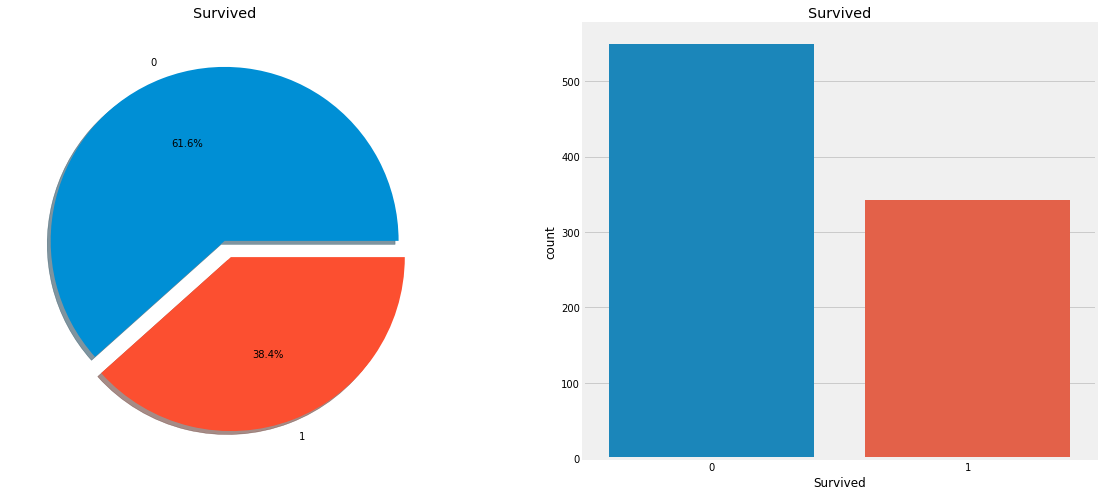

In [4]:
# Survived 그래프
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

훈련 데이터 승객 891명 중 350명만이 살아남았다.<br>
즉, 전체 훈련 세트 중 **38.4%**만 추락에서 살아남았다.

우리는 데이터로부터 더 나은 통찰력을 얻고, 승객의 어떤 범주가 살아남았고, 누가 살아남지 못했는지를 보기 위해 더 깊이 파고들 필요가 있다.

데이터 세트의 다양한 기능을 활용하여 생존율을 확인하도록 노력하겠다.<br>
그 특징들 중 일부는 Sex, Age, 취항 항구 등이다.

먼저 다양한 유형의 변수를 이해하도록 하자.

## <font color="red">변수 유형</font>
<br>
1. <font color="green">범주형 변수</font>

두 개 이상의 범주를 가진 변수로, 질적 변수라고도 한다.<br>
해당 변수의 각 값은 범주별로 분류할 수 있다.<br>
예를 들어 성별 칼럼은 두 개의 범주(남성과 여성)를 갖는 범주형 변수다.<br>
우리는 그러한 변수들에 대해 어떤 주문도 할 수 없다.<br>

**train 데이터의 범주형 변수: Sex, Embarked.**

2. <font color="green">서수형 변수</font>

범주형 변수와 유사하나, 값 사이의 상대적 순서나 정렬을 가질 수 있다는 것이 다르다.<br>
예를 들어 Height라는 칼럼이 Tall, Medium, Short라는 값을 가진다면 Height는 서수형 변수다.<br>
여기서 우리는 그 변수에서 상대적인 종류를 가질 수 있다.

**train 데이터의 서수형 변수: PClass**

3. <font color="green">연속 변수</font>

칼럼의 최소값 또는 최대값 사이에서 값을 얻을 수 있는 경우 연속 변수로, 양적 변수라고도 한다.

**train 데이터의 연속 변수: Age**

<div align="right">[목차로](#0)</div>
<a id="2"></a> <br>
## 1-1. 변수 개별 분석

<div align="right">[목차로](#0)</div>
<a id="3"></a> <br>
### 1-1-1. Sex : 범주형 변수

In [5]:
# 성별과 생존 간의 관계
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

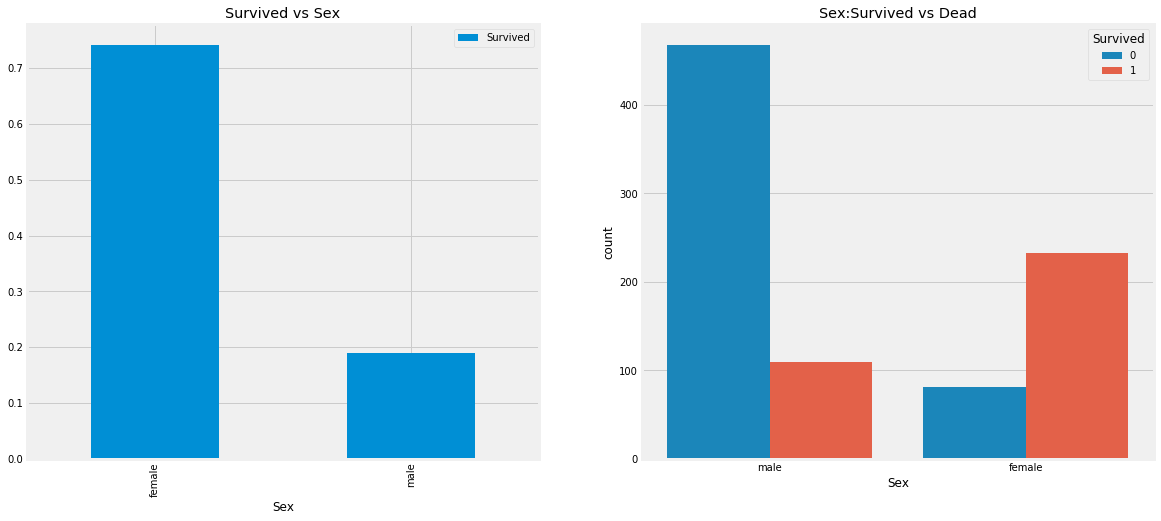

In [6]:
# 그래프 그리기
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

배에 타고 있는 남자들의 수는 여자들의 숫자보다 훨씬 많다.<br>
생존한 여성의 수는 생존한 남성의 거의 두 배에 가깝다.<br>
배에 타고 있는 여성의 생존율은 약 75%인데 반해 남성은 약 18-19%이다.

이 변수는 모델링에 매우 중요한 변수인 것 같지만 확실하지는 않다.

다른 변수도 확인해보자.

<div align="right">[목차로](#0)</div>
<a id="4"></a> <br>

### 1-1-2. Pclass : 서수형 변수

In [7]:
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


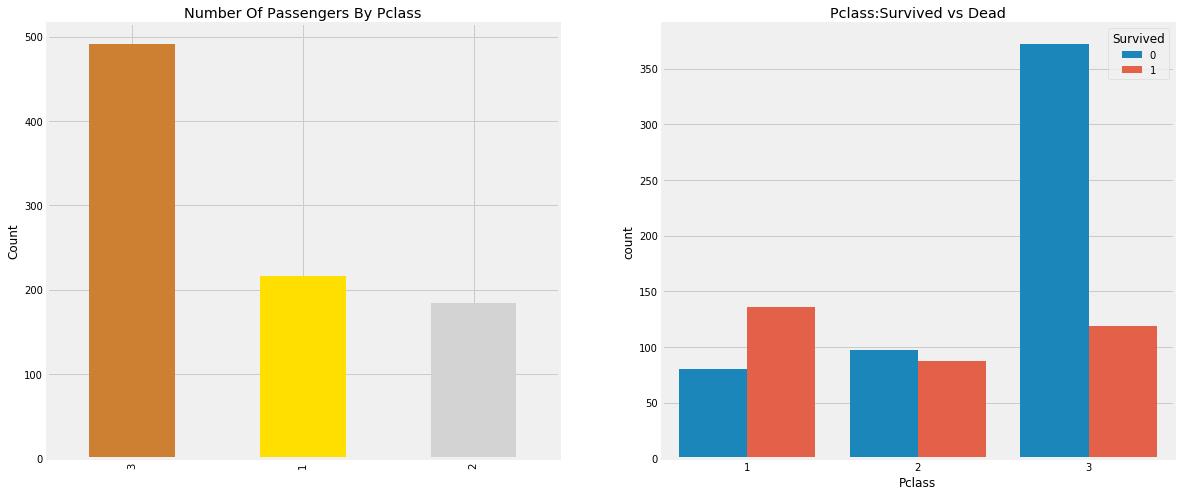

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

"돈으로 모든 것을 살 수는 없다"라는 말이 있다.<br>
그러나 Pclass 1 승객들은 구조에 있어 매우 높은 우선순위를 부여받았음을 분명히 알 수 있다.<br>
반면 Pclass 3의 승객 수는 훨씬 더 많았지만, 그들의 생존 수는 25% 정도로 매우 낮다.<br>
Pclass 1 승객의 생존률은 63%, Pclass 2 승객의 생존률은 48%이다.<br>
<font color="grey">그래서 돈과 지위가 중요하다. 이런 xx.</font><br>

다른 흥미로운 관찰도 함께 확인해보자.<br>
Sex, Pclass와 생존율을 함께 비교해보자.

In [9]:
# Sex, Pclass와 생존 간의 관계
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

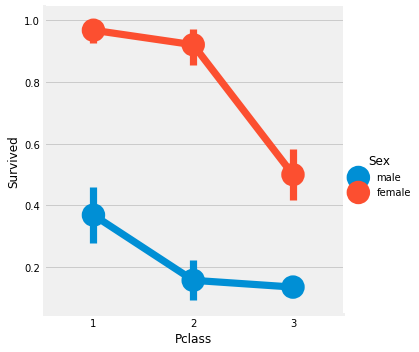

In [10]:
# Sex, Pclass와 생존 간의 그래프 그리기
sns.factorplot('Pclass','Survived',hue='Sex',data=train)
plt.show()

여기에서는 **FactorPlot**을 사용했다. 범주적 가치의 분리를 용이하게 하기 때문이다.

**CrossTab**와 **FactorPlot**를 보자.<br>
Pclass 1의 여성 생존율은 약 95-96%로, Pclass1 여성 94명 중 3명만이 사망했다는 것을 쉽게 알 수 있다.
Pclass에 관계 없이, 여성들은 구조하는 동안 우선권을 가졌다는 것은 명백하다.

반면 Pclass 1의 남성들은 생존율이 매우 낮다.

Pclass도 중요한 변수인 것 같다. 다른 변수를 분석해보자.

<div align="right">[목차로](#0)</div>
<a id="5"></a> <br>

### 1-1-3. Age : 연속형 변수

In [11]:
# 승객의 나이 분석
print('Oldest Passenger was of:',train['Age'].max(),'Years')
print('Youngest Passenger was of:',train['Age'].min(),'Years')
print('Average Age on the ship:',train['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


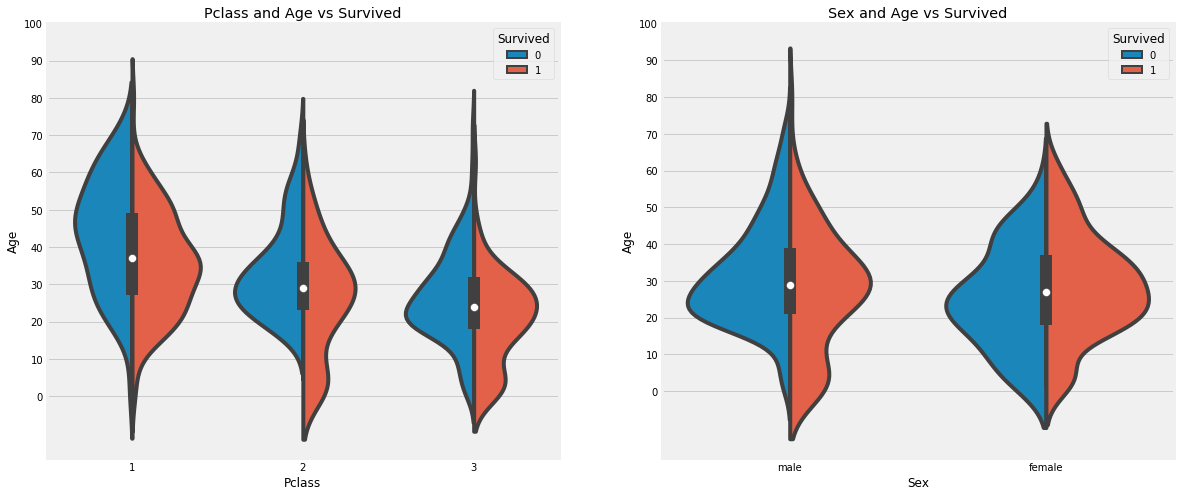

In [12]:
# Age, Pclass, Sex와 생존 간의 그래프
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

1) 젊은 사람의 수는 Pclass 수가 높을수록 많고, 10세 미만 어린이의 생존율은 Pclass에 관계 없이 양호해 보인다.

2) Pclass 1에서 20-50세의 승객이 생존 가능성이 높고 여성일 경우 더욱 높다.

3) 남성 승객의 경우 나이가 많아지면 생존 확률이 줄어든다.

앞에서 살펴본 바와 같이, Age 변수는 177개의 null 값을 가진다.<br>
결측값을 대체하기 위해 Age의 평균값을 할당한다.

문제는 연령대가 다양하다는 것이다.<br>
우리는 29살과 4살을 비교할 수 없다.<br>

이를 해결할 수 있는 방법은 'Name' 변수로써 확인할 수 있다.<br>
Name 변수를 보면 Mr. 또는 Mrs.처럼 나이를 구분할 수 있다는 것을 알 수 있다.<br>
따라서 우리는 각 그룹에 Mrs와 Mrs의 평균값을 할당할 수 있다.

In [13]:
# Initial 변수 생성, 특정 이름 추출
train['Initial'] = 0
for i in train:
    train['Initial'] = train.Name.str.extract('([A-Za-z]+)\.')

여기서 extract 함수 안의 string은,<br>
.(도트) 앞에 있는 **A-Z 또는 a-z** 사이에 있는 문자열을 찾는 것이다.

이름에서 이니셜을 추출하는 데 성공했다.

In [14]:
# 성별과 이름 간의 관계 파악
pd.crosstab(train.Initial,train.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [15]:
# 고유 이름을 Miss, Mr, Other로 변경
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                          'Jonkheer','Col','Rev','Capt','Sir','Don'],
                         ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs',
                          'Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [16]:
# 이니셜별 평균 나이 확인
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

아까 Age 변수에서 결측값이 177개 있었다. 이를 채워주자.

In [17]:
# Age 결측값 대체
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']=46

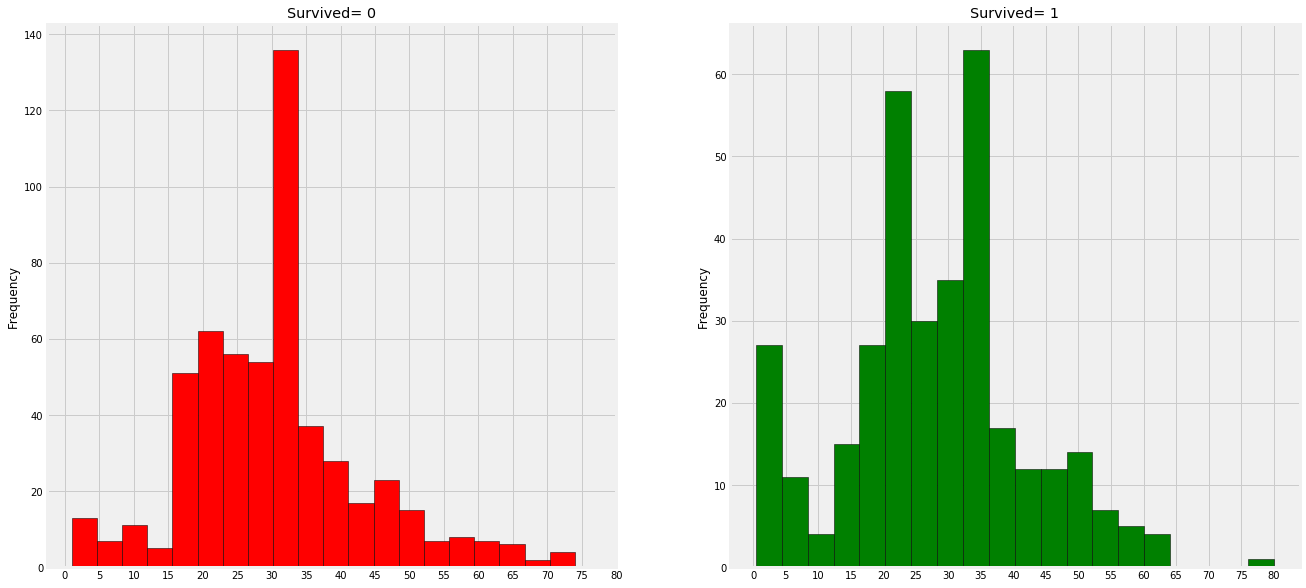

In [18]:
# 연령별 생존자와 연령별 사망자 그래프
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

1) 5세 미만의 유아가 많이 구조되었다. (여자와 아이를 먼저 구했다는 것을 알 수 있다.)

2) 가장 나이가 많은 승객(80년대)이 구조되었다.

3) 최대 사망자는 30-40세에 분포되어 있다.

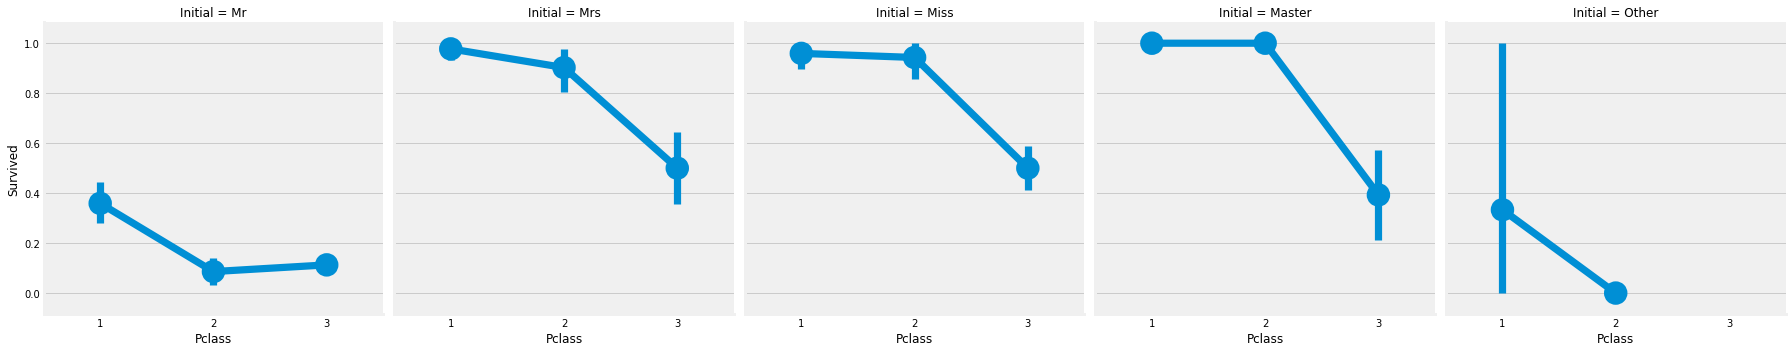

In [19]:
# 각 이니셜 별 Pclass와 생존 간의 그래프
sns.factorplot('Pclass','Survived',col='Initial',data=train)
plt.show()

<div align="right">[목차로](#0)</div>
<a id="6"></a> <br>

### 1-1-4. Embarked : 범주형 변수

In [20]:
# Embarked, Pclass, Sex와 생존 간의 관계
pd.crosstab([train.Embarked,train.Pclass],[train.Sex,train.Survived],margins=True).style.background_gradient(cmap='summer_r')

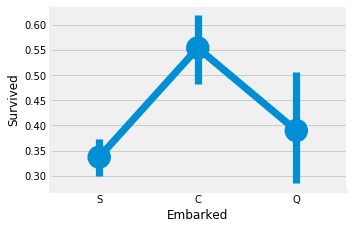

In [21]:
# 입항항구와 생존 간의 그래프
sns.factorplot('Embarked','Survived',data=train)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

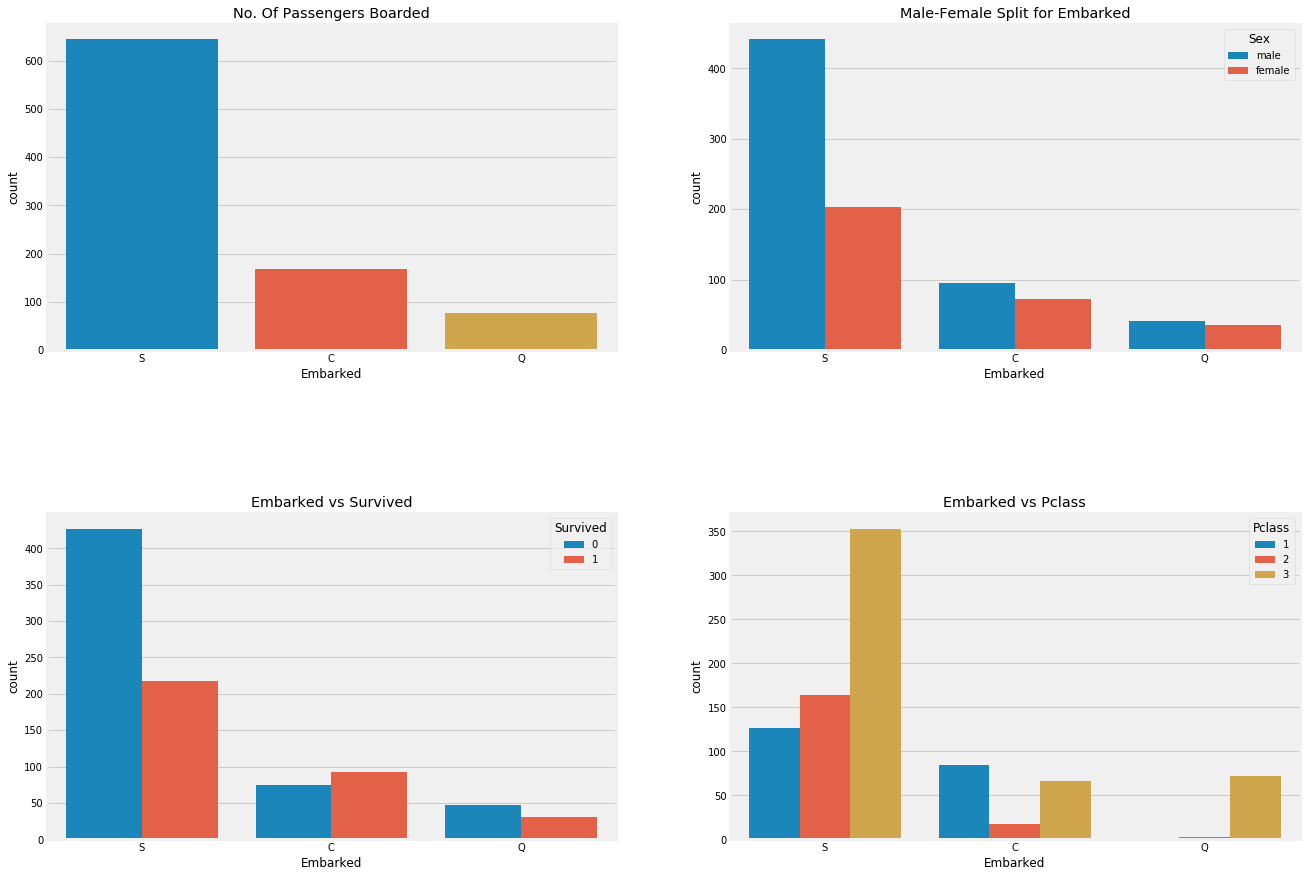

In [22]:
# Embarked, Sex, Pclass와 생존 각각의 그래프
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

1) S에 가장 많은 승객이 탑승했고, 그들 중 대부분은 Pclass 3이다.

2) C에서 온 승객들은 대부분 살아남았기 때문에 운이 좋아 보인다. 그 이유는 아마도 모든 Pclass 1과 Pclass 2 승객들의 구조일 것이다.

3) S는 부자의 대다수가 탑승하는 항구인 듯하다. 그런데 생존 가능성은 낮은데, 이는 Pclass 3 승객의 81%가 살아남지 못했기 때문이다.

4) Q는 승객의 95% 가까이가 Pclass 3이었다.

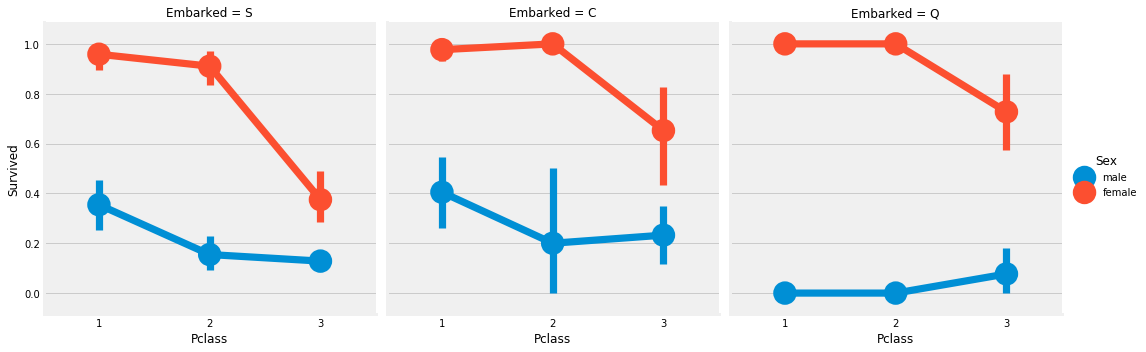

In [23]:
# Embarked, Sex, Pclass, 생존 간 그래프 2
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train)
plt.show()

1) Embarked에 관계없이 Pclass 1과 Pclass 2 승객의 생존률은 100%에 가깝다.

2) 왼쪽 S를 보면, 남녀 생존율이 매우 낮다. Pclass 3 승객은 매우 운이 없어 보인다.

3) 왼쪽 Q를 보면, 거의 모두 Pclass 3 승객이다. 남성들이 가장 불행해 보인다.

Embarked 변수에도 2개의 결측치가 있는데,<br>
승객의 대부분이 S이기 때문에 이 결측치는 최빈값인 S로 대체하도록 하겠다.

In [24]:
# Embarked 변수 결측치 제거
train['Embarked'].fillna('S',inplace=True)

<div align="right">[목차로](#0)</div>
<a id="7"></a> <br>

### 1-1-5. SibSp : 명목 변수
이 변수는 대상이 혼자인지 가족과 함께 있는지 여부를 나타낸다.

형제자매 = 형제, 자매, 의붓형제<br>
배우자 = 남편, 아내

In [25]:
# SibSp와 생존 간의 관계
pd.crosstab([train.SibSp],train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


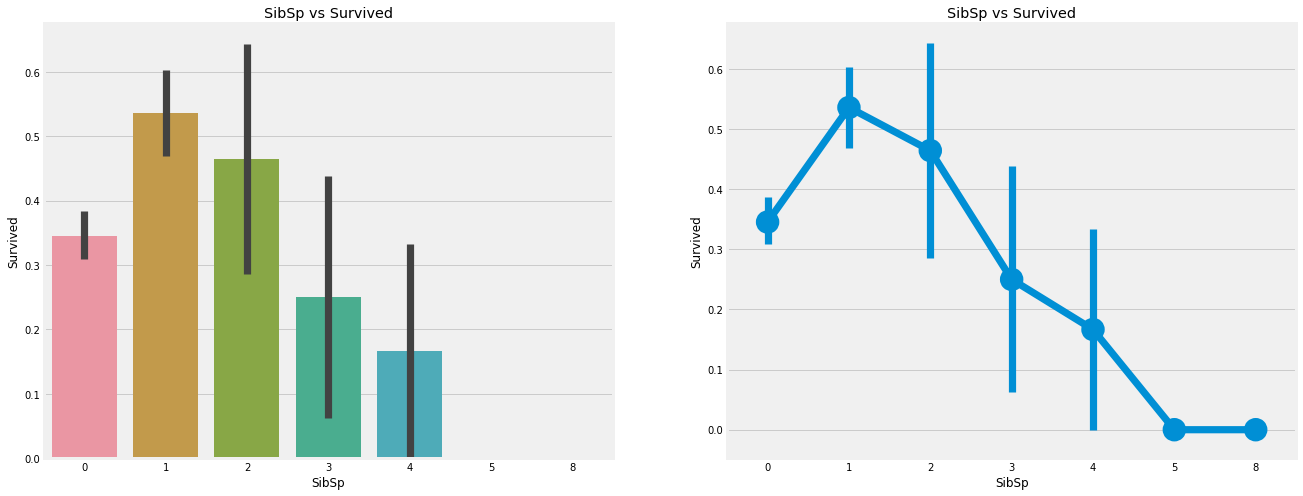

In [26]:
# SibSp와 생존 간의 그래프
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=train,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=train,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [27]:
# SibSp와 Pclass 간의 관계
pd.crosstab(train.SibSp,train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


형제자매가 없이 혼자 배에 탄 승객의 생존율은 34.5%이다.<br>
형제의 수가 증가하면 그래프는 대략 감소할 것이다.<br>
만약 배에 가족이 있다면, 나는 먼저 나를 구하지 않고 그들을 구하려고 노력할 것이다.

그런데 5-8명의 구성원을 가진 가정의 생존율은 0%이다.<br>
이유는 Pclass에 있다.<br>
crosstab을 보면, 3명 이하의 구성원이 있는 사람은 모두 Pclass 3이다.<br>
Pclass 3에서는 4명 이상의 대가족이 모두 죽었다는 것이 확실히 보인다.

<div align="right">[목차로](#0)</div>
<a id="8"></a> <br>

### 1-1-6. Parch : 명목 변수

In [28]:
pd.crosstab(train.Parch,train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


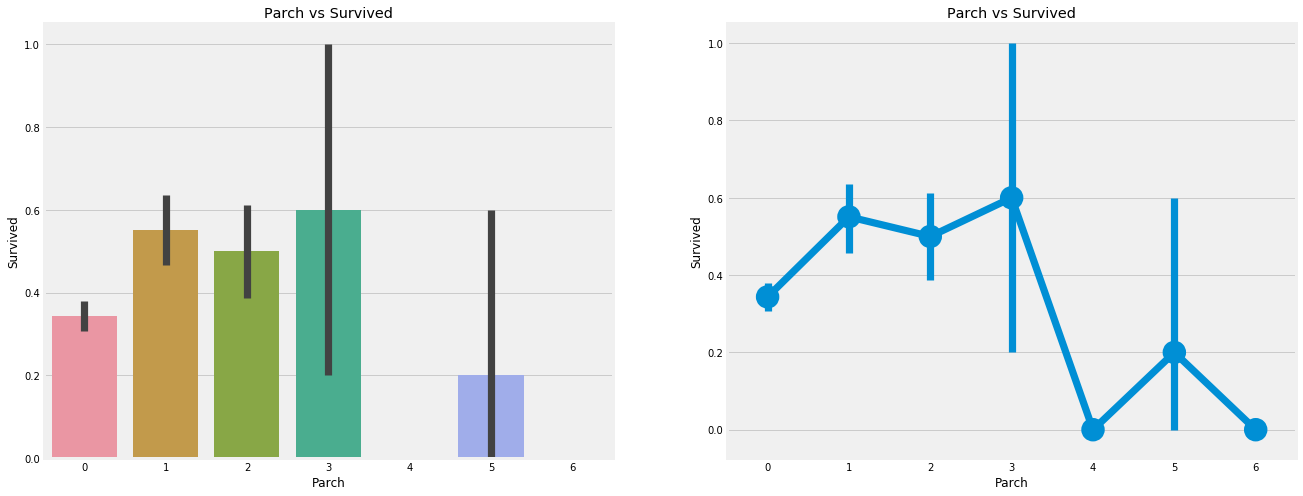

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=train,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=train,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

여기에서도 결과는 상당히 비슷하다.<br>
부모를 태운 승객은 생존 가능성이 더 높다. 그러나 숫자가 증가함에 따라 감소한다.

생존 가능성은 1-3명의 부모를 가진 사람에게 높게 나온다.<br>
혼자라는 것은 치명적이며, 누군가가 배 안에 4명 이상 부모를 가지고 있을 때 생존 가능성이 줄어든다는 것을 증명한다.

<div align="right">[목차로](#0)</div>
<a id="9"></a> <br>

### 1-1-7. Fare : 연속형 변수

In [30]:
print('Highest Fare was:', train['Fare'].max())
print('Lowest Fare was:',train['Fare'].min())
print('Average Fare was:',train['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


재미있는 사실은, Lowest Fare가 0.0인 승객이 존재한다는 것이다.

영화 타이타닉의 남자 주인공이 그러한 예시가 될 수 있겠다.

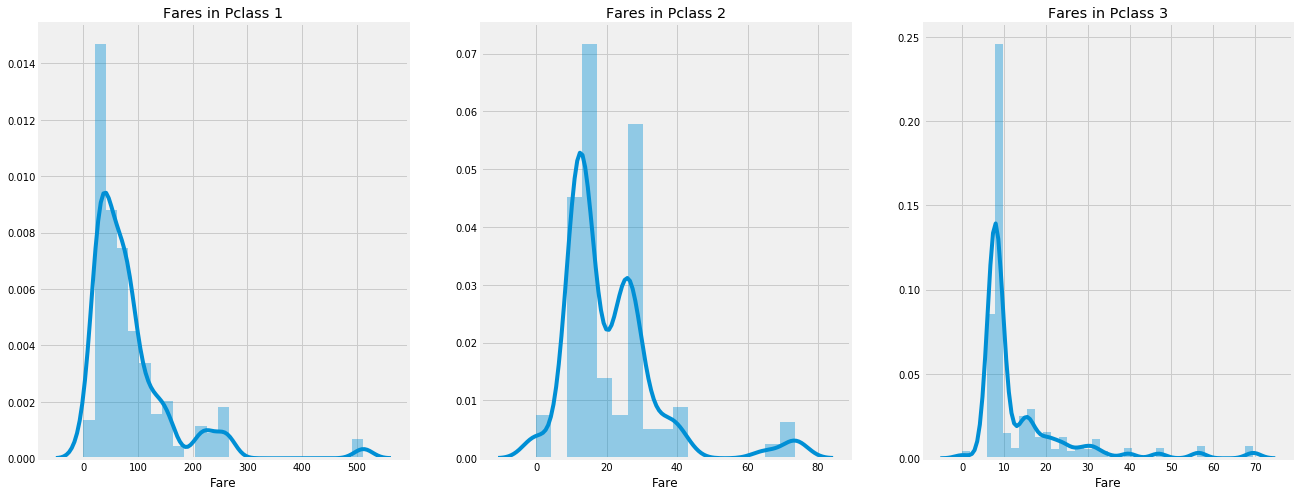

In [31]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass 1 승객 요금이 전체적으로 높은 것을 보아<br>
Pclass 1 승객이 가장 많다는 것을 볼 수 있는데, 이 분포는 기준이 줄어들면서 계속 감소한다.<br>

<div align="right">[목차로](#0)</div>
<a id="10"></a>
## 1-2. 변수 종합 분석

모든 변수에 대한 개별적 분석을 종합했다.

- Sex : 남성에 비해 여성의 생존 가능성은 높다.
- Pclass : Pclass 1 승객은 생존율이 높은 추세인 반면, Pclass3의 생존율은 매우 낮다.<br>
Pclass 1 여성 승객의 생존 가능성은 거의 1이며, Pclass 2 승객도 역시 높다.
- Age : 5-10세 미만의 아이들은 생존 가능성이 높다. 15세에서 35세 사이의 승객들은 많이 죽었다.
- Embarked : C의 생존률은 Pclass 1 승객의 대다수가 S에서 일어났음에도 불구하고 보다 더 나은 것으로 보인다.<br>
Q의 승객은 모두 Pclass 3 승객이다.
- Parch + SibSp : 1-2명의 형제, 배우자 또는 1-3명의 부모를 갖는 것은<br>
혼자 있거나 당신과 함께 여행하는 대가족보다 생존률이 더 높다는 것을 보여준다.

<br>
이제 각 변수들 간의 상관관계를 분석해보자.

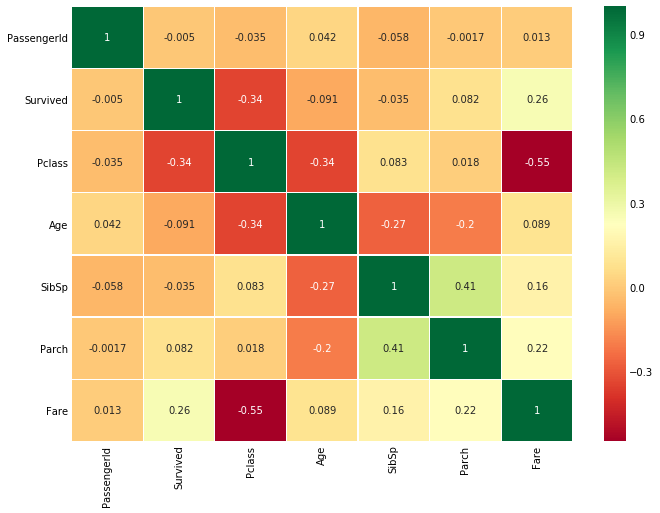

In [32]:
# 상관관계 분석 그래프(train.corr : 상관관계 행렬)
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### 히트맵 해석

알아둬야 할 것은, 알파벳이나 문자열 사이에 상관관계가 있을 수 없기 때문에 숫자 변수만 비교된다는 점이다.<br>
그림을 이해하기 전에, 정확히 어떤 상관관계가 있는지 보자.

1. 양의 상관관계 : 변수 A의 증가가 변수 B의 증가로 이어진다면, 그들은 양의 상관관계에 있다. 특히 값이 1이면 완벽한 양의 상관 관계를 의미한다.
2. 음의 상관관계 : 변수 A의 증가가 형상 B의 감소로 이어진다면, 그들은 음의 상관관계에 있다. 특히 값이 -1이면 완벽한 음의 상관 관계를 의미한다.

어떤 두 변수가 완벽한 양의 상관관계에 있어 한 변수값이 증가하면 다른 변수값도 증가한다고 하자.<br>
이는 두 변수 모두 매우 유사한 정보를 포함하고 있으며, 정보의 차이가 거의 없거나 전혀 없다는 것을 의미한다.<br>
이것은 둘 다 거의 같은 정보를 포함하고 있기 때문에 <font color="red">다중공선성</font>이라고 한다.

둘 중 하나가 중복된 것처럼 둘 다 사용해야 한다고 생각하는가?<br>
우리는 모델을 생성하고 학습할 때, 중복된 특징이 훈련 시간과 많은 장점을 줄이기 때문에 이들을 제거하도록 노력해야 한다.

위의 히트맵에서 우리는 그 특징들이 그다지 상관관계가 없다는 것을 알 수 있다.<br>
가장 높은 상관관계는 SibSp와 Parch(0.41)이다. 따라서 우리는 이 둘을 제외한 모든 변수는 유지할 수 있다고 봐도 된다.

<div align="right">[목차로](#0)</div>

------------------------------------------------------------------------------------------------
<a id="11"></a> <br>
# 2. 데이터 전처리

<div align="right">[목차로](#0)</div>
<a id="12"></a> <br>
### 2-1. Age : 카테고리화

만약 Age 별로 그룹을 분류한다면 어떻게 할 것인가? 만약 30명의 사람들이 있다면, 30명의 나이 값이 있을 수 있다. 이제 이것은 문제가 될 수 있다.

따라서 Age 변수는 재정렬 또는 정규화를 통해 연속적인 값을 범주형 값으로 변환할 필요가 있다.<br>
우리는 여기서 빈닝(binning) 기법을 사용할 것이다. 즉, 다양한 연령대를 하나의 빈(bin)으로 그룹화하거나 단일 값을 할당할 것이다.

승객의 최대 연령은 80세였고, 0-80의 범위를 8개의 그룹으로 나누면 된다.<br>
그룹 : 10세 이하, 11~20, 21~30, 31~40, 41~50, 51~60, 61~70, 71세 이상

참고로 원본은 5개의 그룹(16세 단위)으로 나누었는데, 더 깔끔한 데이터를 만들기 위해 세분화시킨다.

In [33]:
# Age 카테고리화
train['Age_band'] = 0
train.loc[train['Age']<=10,'Age_band']=0 # 0세
train.loc[(train['Age']>10)&(train['Age']<=20),'Age_band']=1 # 10대
train.loc[(train['Age']>20)&(train['Age']<=30),'Age_band']=2 # 20대
train.loc[(train['Age']>30)&(train['Age']<=40),'Age_band']=3 # 30대
train.loc[(train['Age']>40)&(train['Age']<=50),'Age_band']=4 # 40대
train.loc[(train['Age']>50)&(train['Age']<=60),'Age_band']=5 # 50대
train.loc[(train['Age']>60)&(train['Age']<=70),'Age_band']=6 # 60대
train.loc[train['Age']>70,'Age_band']=7 # 70대
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3


In [34]:
# 각 연령대별 승객 수 비교
train['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
3,292
2,266
1,115
4,86
0,68
5,42
6,17
7,5


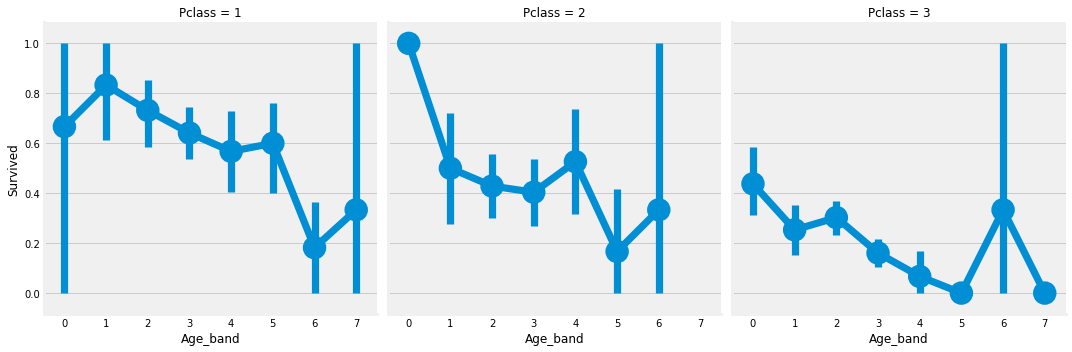

In [35]:
# 연령대별 Pclass별 생존률 비교
sns.factorplot('Age_band','Survived',data=train,col='Pclass')
plt.show()

<div align="right">[목차로](#0)</div>
<a id="13"></a> <br>
### 2-2. FamilySize : SibSp + Parch

SibSp와 Parch 두 변수의 상관관계가 높아 다중공선성이 발생할 수 있다.<br>
이를 보정하기 위해 두 변수를 합쳐 FamilySize라는 새로운 변수로 만들고, 기존의 두 변수는 삭제하도록 하겠다.<br>
그리고 혼자인 사람을 위해 Alone이라는 변수도 하나 만들어 비교해보겠다.

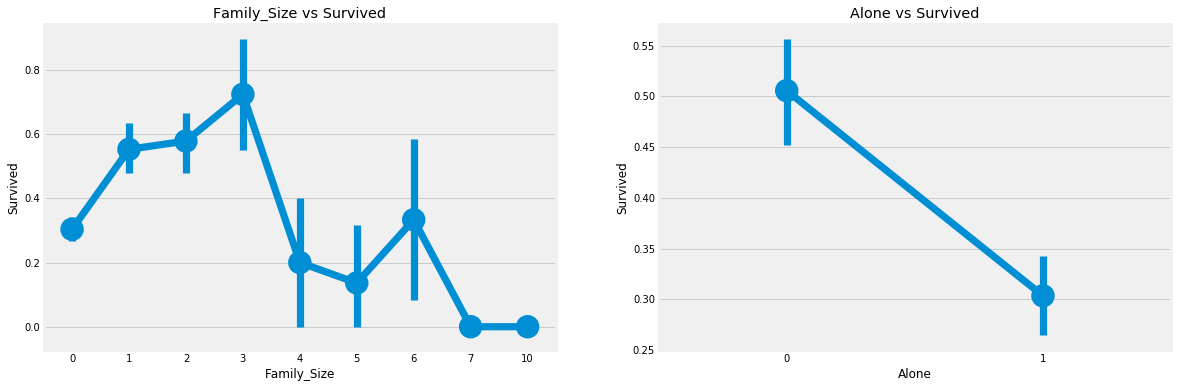

In [36]:
# 변수 생성
train['Family_Size']=0
train['Family_Size']=train['Parch']+train['SibSp']
train['Alone']=0
train.loc[train.Family_Size==0,'Alone']=1

# 변수들의 비교
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=train,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=train,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

FamilySize=0은 승객이 혼자라는 것을 의미한다.<br>
분명히 혼자(FamilySize=0)인 경우 생존 가능성은 매우 낮다.

FamilySize 4의 경우, 생존률이 갑자기 줄어든다. 이것은 모델의 중요한 특징으로 보인다.

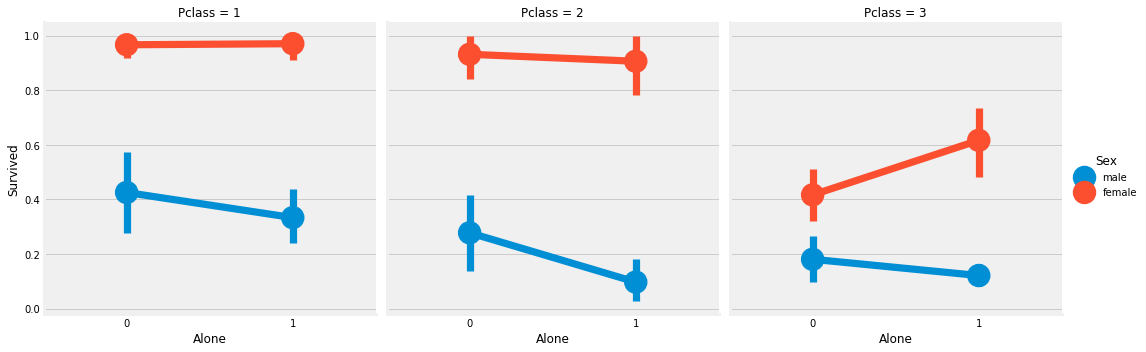

In [37]:
sns.factorplot('Alone','Survived',data=train,hue='Sex',col='Pclass')
plt.show()

Pclass에 상관없이 독신인 남성들은 대부분 생존률이 낮다는 것을 보여준다.<br>
또 Pclass 3의 독신 여성들도 생존률이 낮다는 것을 볼 수 있다.

<div align="right">[목차로](#0)</div>
<a id="14"></a> <br>
### 2-3. Fare : 카테고리화

Fare 또한 연속형 변수이기 때문에, 우리는 이를 서수형 변수로 바꿀 필요가 있다.

Pandas 패키지의 qcut 함수는 이를 도와줄 것이다. 8개로 나누면 8개의 단위를 같은 간격으로 값이 정렬될 것이다.

In [38]:
train['Fare_Range']=pd.qcut(train['Fare'],4)
train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


확실히 운임이 비싼 범위일수록 생존률도 크다는 것을 바로 볼 수 있다.

이제 이 또한 Age와 같이 카테고리화시켜주자.

In [39]:
# Fare 카테고리화
train['Fare_cat']=0
train.loc[train['Fare']<=7.91,'Fare_cat']=0
train.loc[(train['Fare']>7.91)&(train['Fare']<=14.454),'Fare_cat']=1
train.loc[(train['Fare']>14.454)&(train['Fare']<=31),'Fare_cat']=2
train.loc[train['Fare']>31,'Fare_cat']=3

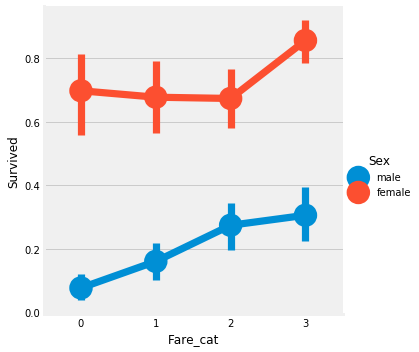

In [40]:
# Fare_cat, Sex별 생존률 그래프
sns.factorplot('Fare_cat','Survived',data=train,hue='Sex')
plt.show()

Fare_cat이 증가할수록 생존률은 증가한다. 이는 Sex 변수와 함께 모델링 시 중요한 특징이 될 수 있다.

<div align="right">[목차로](#0)</div>
<a id="15"></a> <br>
### 2-4. 문자열 수치화 및 불필요 변수 제거

Sex, Embarked, Initial 변수는 모두 문자열 값으로 이루어진 범주형 변수이다.<br>
우리는 문자열이 아닌 수치로 변경시켜줄 필요가 있다.

또한 모델링 시 필요 없는 변수들은 제거해주도록 하자.
- 불필요 변수 : Name, Age, Ticket, Fare, Cabin, Fare_Range, PassengerId, SibSp, Parch
<br>(Cabin은 결측치가 너무 많아 제외하도록 한다.)

In [41]:
# 문자열 수치화
train['Sex'].replace(['male','female'],[0,1],inplace=True)
train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

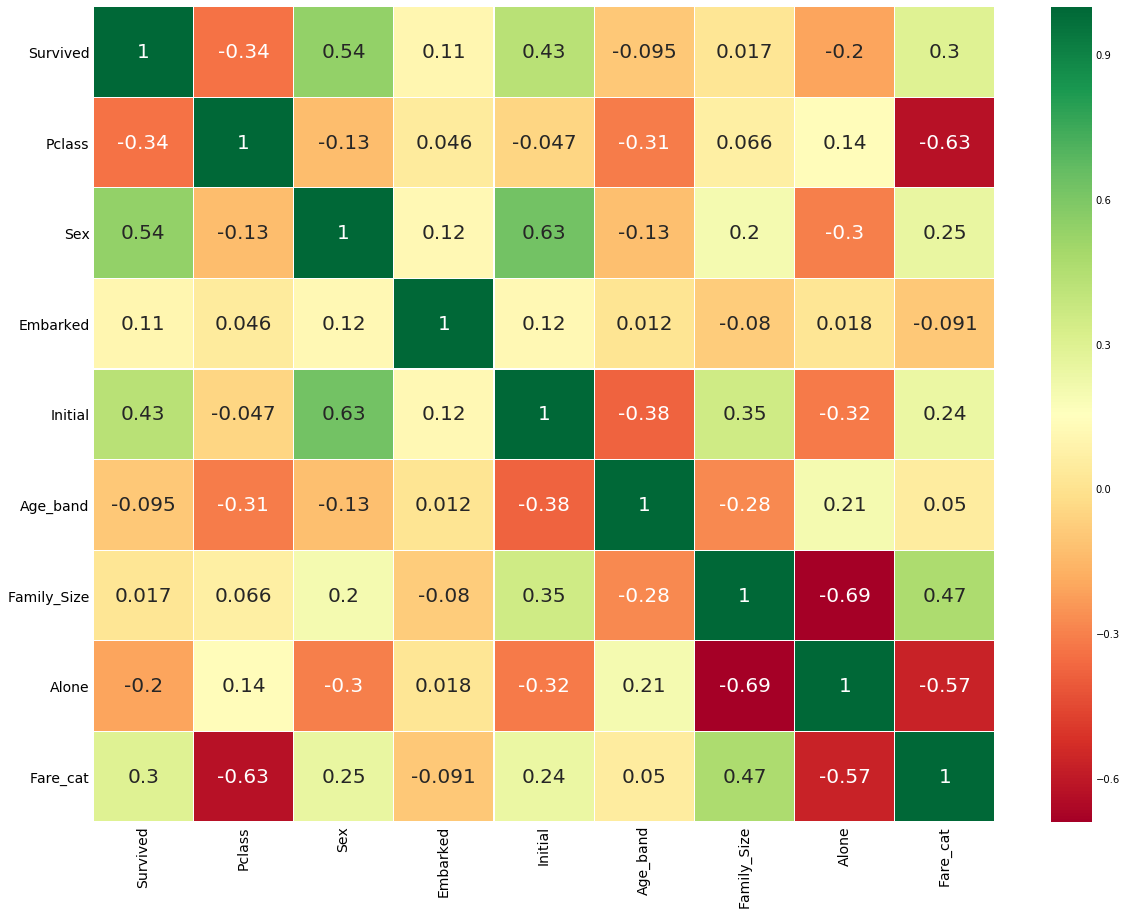

In [42]:
# 불필요 변수 제거 후 각 변수별 상관관계 분석
train.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId', 'SibSp', 'Parch'],axis=1,inplace=True)
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<div align="right">[목차로](#0)</div>

------------------------------------------------------------------------------------------------
<a id="16"></a> <br>
# 3. 예측 모델 생성

우리는 EDA 부분에서 약간의 통찰력을 얻었다.<br>
그러나 그것으로 우리는 승객이 살아남을지 죽을지를 정확하게 예측하거나 말할 수 없다.<br>
그래서 이제 우리는 몇 가지 훌륭한 분류 알고리즘을 사용하여 탑승객의 생존 여부를 예측할 것이다.

다음은 모델을 만드는 데 사용할 알고리즘이다.

1. Logistic Regression
2. Support Vector Machines(Linear and radial)
3. Random Forest
4. K-Nearest Neighbours
5. Gaussian Naive Bayes
6. Decision Tree

In [43]:
# ML 전용 패키지 모두 임포트
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [44]:
# 훈련데이터, 테스트데이터 분리
train_a,test_a=train_test_split(train,test_size=0.3,random_state=0,stratify=train['Survived'])
train_X=train_a[train_a.columns[1:]]
train_Y=train_a[train_a.columns[:1]]
test_X=test_a[test_a.columns[1:]]
test_Y=test_a[test_a.columns[:1]]
X=train[train.columns[1:]]
Y=train['Survived']

<div align="right">[목차로](#0)</div>
<a id="17"></a> <br>
### 3-1. 기초 알고리즘 실행

In [45]:
# 1. Logiistic Regression
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction1 = model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction1, test_Y))

The accuracy of the Logistic Regression is 0.8097014925373134


In [46]:
# 2-1. Linear SVM(Support Vector Machines)
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8097014925373134


In [47]:
# 2-2. Radial SVM(Support Vector Machines)
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction3,test_Y))

Accuracy for rbf SVM is  0.8283582089552238


In [48]:
# 3. Random Forest
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Random Forests is 0.8097014925373134


In [49]:
# 4. K-Nearest Neighbors
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8059701492537313


참고로 KNN 알고리즘은 n_neighbors의 속성값을 변경함에 따라 정확도가 달라지며, 기본값은 5로 주어진다.

간단하게 변경해보고 정확도를 판단해보자.

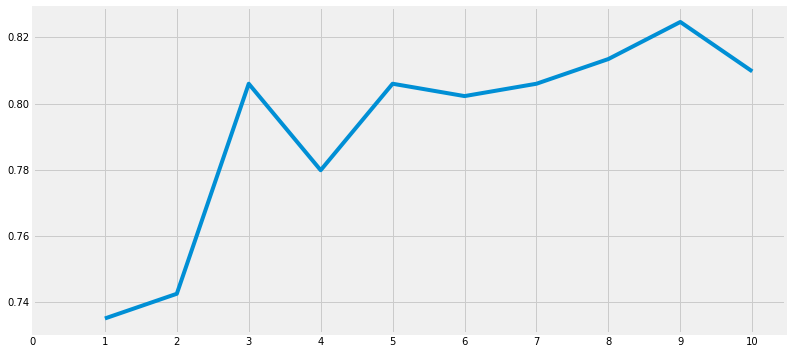

Accuracies for different values of n are: [0.73507463 0.74253731 0.80597015 0.77985075 0.80597015 0.80223881
 0.80597015 0.81343284 0.82462687 0.80970149] with the max value as  0.8246268656716418


In [50]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [51]:
# 5. Gaussian Naive Bayes
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8208955223880597


In [52]:
# 6. Decision Tree
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction7,test_Y))


The accuracy of the Decision Tree is 0.8171641791044776


각 모델별 정확도 비교

- Logistic Regression(로지스틱 회귀) : 0.8097014925373134
- linear SVM(선형 SVM) : 0.8097014925373134
- Radial SVM(방사형 SVM) : 0.8283582089552238
- Random Forests(랜덤 포레스트) : 0.8208955223880597
- KNN(K-최근접이웃) : 0.8246268656716418 (K=9일 때)
- NaiveBayes(나이브-베이즈) : 0.8208955223880597
- Decision Tree(의사결정나무) : 0.8171641791044776

대체적으로 대부분 80~82%의 정확도를 가진다.


<div align="right">[목차로](#0)</div>
<a id="18"></a> <br>
### 3-2. 교차검증(Cross Validation)

모델의 정확성이 분류기의 견고함을 결정하는 유일한 요소는 아니다.

분류기가 훈련 데이터를 통해 훈련되고 테스트 데이터를 통해 테스트되며 90%의 정확도를 달성한다고 가정해보자.<br>
이는 분류기에게 매우 좋은 정확성으로 보이지만,<br>
훈련 데이터가 아닌 테스트 데이터에 대해 90%가 될 것임을 확인할 수 있는가? 아니다!<br>
분류기가 자신을 훈련시키기 위해 어떤 인스턴스를 사용할지 결정할 수 없기 때문이다.

훈련 데이터와 테스트 데이터가 변화함에 따라 정확성도 달라질 것이다. 그것은 증가하거나 감소할 수 있다. 이를 "모델 분산"이라고 한다.

이를 극복하고 일반화된 모델을 얻기 위해, 우리는 교차검증(Cross Validation)을 사용한다.

많은 경우 데이터는 불균형하다.<br>
즉, 많은 수의 클래스1 인스턴스가 있을 수 있지만 다른 클래스 인스턴스는 더 적다.<br>
따라서 데이터셋의 각 인스턴스에 대한 알고리즘을 훈련하고 테스트해야 한다.<br>
그러면 데이터셋에 대한 모든 정확도를 평균적으로 파악할 수 있다.<br>
이것을 <font color="red">K-Fold Cross Validation이라고 한다.</font>

1. K-Fold Cross Validation은 먼저 데이터셋을 k-subset으로 나누는 방식으로 작동한다.
2. 데이터셋을 (k=5)부분으로 나눈다고 하자. 우리는 테스트를 위해 1번째 부분을 선시행하고, 4 부분에 걸쳐 알고리즘을 훈련시킨다.
3. 각 반복에서 시험부위를 변경하고 다른부위에 대해 알고리즘을 훈련하는 등 공정을 계속한다. 그런 다음 알고리즘의 평균 정확도를 얻기 위해 정확도와 오류를 평균한다.
4. 알고리즘은 일부 훈련 데이터의 경우 데이터 집합보다 적합할 수 있으며, 때로는 다른 훈련 세트의 경우에도 지나치게 적합할 수 있다. 따라서 교차 검증을 통해 일반화된 모델을 달성할 수 있다.

In [53]:
# 교차검증 패키지 임포트
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [54]:
# 교차검증
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','Linear Svm','Radial Svm','Random Forest','KNN','Naive Bayes','Decision Tree']
models=[LogisticRegression(),svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),RandomForestClassifier(n_estimators=100),
        KNeighborsClassifier(n_neighbors=9),GaussianNB(),DecisionTreeClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Logistic Regression,0.803633,0.028183
Linear Svm,0.787853,0.039510
Radial Svm,0.828290,0.035152
Random Forest,0.807041,0.044098
KNN,0.812647,0.038093
Naive Bayes,0.799126,0.036584
Decision Tree,0.803620,0.029607


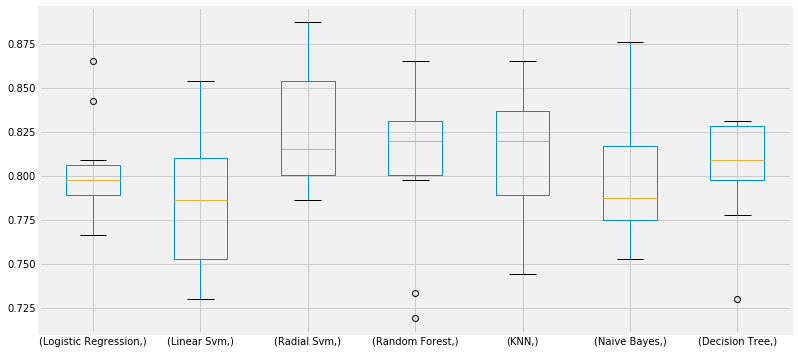

In [55]:
# 각 모델별 교차검증 결과 그래프
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

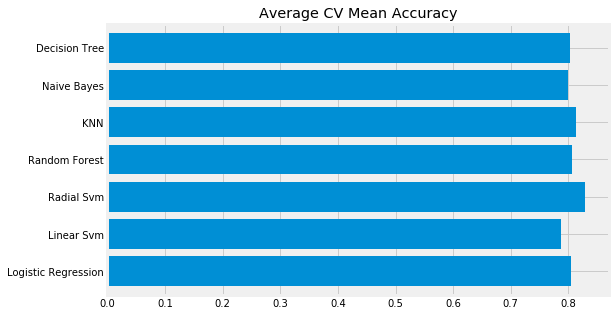

In [56]:
# 각 모델별 교차검증 시행 후 평균 정확도 비교
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

분류 정확도는 불균형으로 인해 때때로 오해의 소지가 있을 수 있다.<br>
우리는 모델이 어디에서 잘못 되었는지 또는 모델이 잘못 예측한 클래스를 보여주는 오차행렬로 요약된 결과를 얻을 수 있다.

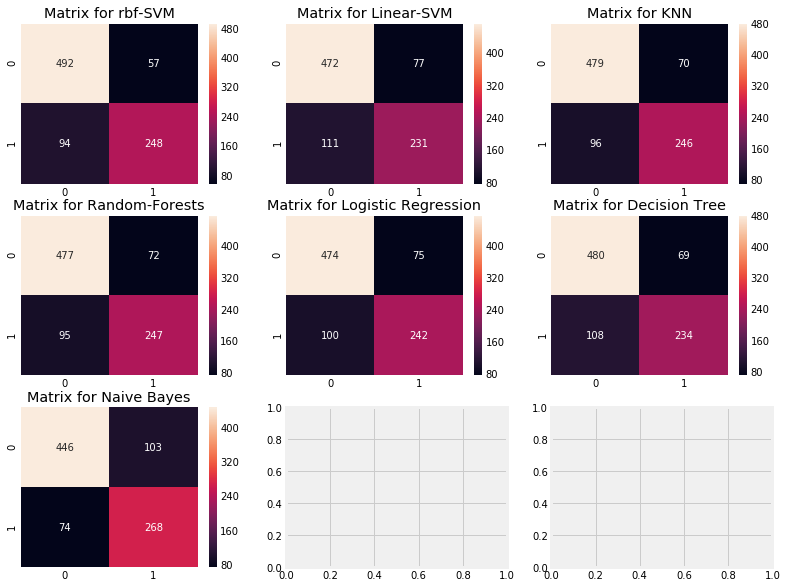

In [57]:
# 모델별 교차검증 후 오차행렬 비교 그래프
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

오차행렬을 해석해보자.

왼쪽 대각선은 각 등급에 대해 이루어진 정확한 예측의 수를 나타내고 오른쪽 대각선은 잘못된 예측의 수를 나타낸다.

rbf-SVM에 대한 첫 번째 그림을 예로 들어보자.
1. 올바르게 예측한 수 : 491(사망) + 247(생존)이므로 평균 CV 정확도는 (491+247)/891 = 82.8%이다.
2. 여기서 오류가 되는 점 : 생존자 58명과 생존자 95명을 사망자로 잘못 분류했다. 따라서 그것은 살아남은 것처럼 죽음을 예측함으로써 더 많은 실수를 저질렀다.

모든 매트릭스를 살펴보자면,<br>
우리는 rbf-SVM이 죽은 승객들을 정확하게 예측할 수 있는 더 높은 기회를 가지고 있고,<br>
Naive Bayes는 생존한 승객들을 정확하게 예측할 수 있는 더 높은 기회를 가지고 있다.

기계학습 모델은 블랙박스와 같다.<br>
이 블랙박스에는 몇 가지 기본 파라미터 값이 있는데, 이 값을 조정하거나 변경하여 더 나은 모델을 얻을 수 있다.<br>
SVM 모델의 C와 gamma처럼, 그리고 다른 분류기에 대해서도 비슷하게 다른 파라미터를 가지며, 이를 하이퍼 파라미터라고 부른다.<br>
이를 조정하여 알고리즘의 학습 속도를 변경하고 더 나은 모델을 얻을 수 있는데, 이를 하이퍼 파라미터 튜닝이라고 한다.

우리는 SVM과 랜덤포스트라는 두 가지 최고 분류자에 대해 하이퍼 파라미터로 튜닝할 것이다.

In [58]:
# SVM
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8327721661054994
SVC(C=0.6, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   12.2s finished


SVM의 경우, C = 0.6이고 gamma = 0.2일 때 83.27%의 정확도를 보인다.

In [59]:
# Random Forests
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   18.6s finished


0.8058361391694725
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


랜덤포레스트의 경우, n-estimators = 800일 때 80.58%의 정확도를 보인다.

<div align="right">[목차로](#0)</div>
<a id="19"></a> <br>
### 3-3. 앙상블 기법

앙상블 기법은 모델의 정확성이나 성능을 높이는 좋은 방법이다. 간단히 말해서, 그것은 강력한 단일 모델을 만들기 위한 다양한 간단한 모델의 조합이다.

우리가 전화기를 구입해서 다양한 매개변수를 바탕으로 많은 사람들에게 그것에 대해 물어보고 싶다고 하자.<br>
그래서 우리는 모든 다른 변수들을 분석한 후에 단일 제품에 대해 강력한 판단을 내릴 수 있다.<br>
우리는 이를 모델의 안정성을 높여주는 Encemblying이라 한다. 앙상블 기법은 다음과 같다.

1. Voting Classifier
2. Bagging
3. Boosting

3-3-1. Voting Classifier

이것은 많은 다른 간단한 기계 학습 모델들의 예측을 결합하는 가장 간단한 방법이다.<br>
모든 하위 모델의 예측을 바탕으로 평균적인 예측 결과를 제공한다.<br>
하위 모델이나 기초 모델은 모두 다 다른 유형이다.

In [60]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8283582089552238
The cross validated score is 0.8192588809442742


2. Bagging

데이터 세트의 작은 파티션에 유사한 분류기를 적용한 다음 모든 예측의 평균을 취함으로써 작동한다.<br>
평균화로 인해, 분산이 감소한다.<br>
투표 분류기와 달리, 배깅은 유사한 분류기를 사용한다.

배깅은 분산이 높은 모델에서 가장 잘 작동한다. 이에 대한 예로는 의사결정 나무나 랜덤 포레스트가 있다.

In [61]:
# Bagging for KNN
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.8208955223880597
The cross validated score for bagged KNN is: 0.8160126546362502


In [62]:
# Bagging for Decision Tree
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8160126546362502


3. Boosting

분류기의 순차적 학습을 사용하는 앙상블링 기법이다. 약한 모델의 단계적 향상이다.

부스팅은 다음과 같이 작동한다.<br>
모델은 먼저 전체 데이터셋에 대해 교육을 받는다.<br>
이제 모델은 몇 가지 예를 들어맞힐 것이고, 다른 것들은 틀릴 것이다.<br>
이제 다음 반복에서 학습자는 잘못 예측된 사례에 더 초점을 맞추거나 그것에 더 많은 비중을 둘 것이다.<br>
따라서 그것은 잘못된 예를 정확하게 예측하려고 할 것이다.<br>
이 반복적인 과정은 계속되며, 정확도에 대한 한계에 도달할 때까지 새로운 분류자가 모델에 추가된다.

In [63]:
# 1. AdaBoost(Adaptive Boosting)
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8282859493814551


In [64]:
# 2. Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8194223130178185


In [65]:
# 3. XGBoost
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8149148791283624


세 부스팅 기법 중에는 AdaBoost가 가장 높은 정확도를 가지기 때문에, 이를 하이퍼 파라미터 튜닝해보겠다.

In [66]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  5.3min finished


0.8316498316498316
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=200, random_state=None)


오랜 시간이 걸려 n_estimators = 200이고 learn_rate = 0.05일 때 0.8316498316498316의 정확도를 얻어냈다.

이제 최고의 모델을 통해 얻은 오차행렬을 보자.

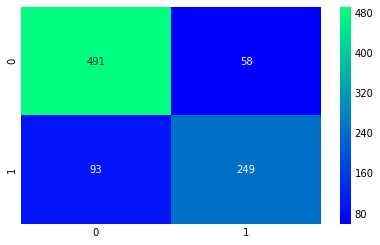

In [67]:
# AdaBoost 오차행렬 
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

<div align="right">[목차로](#0)</div>
<a id="20"></a> <br>
### 3-4. 주요 변수 추출
각종 모델로부터 주요 변수를 확인해보자.

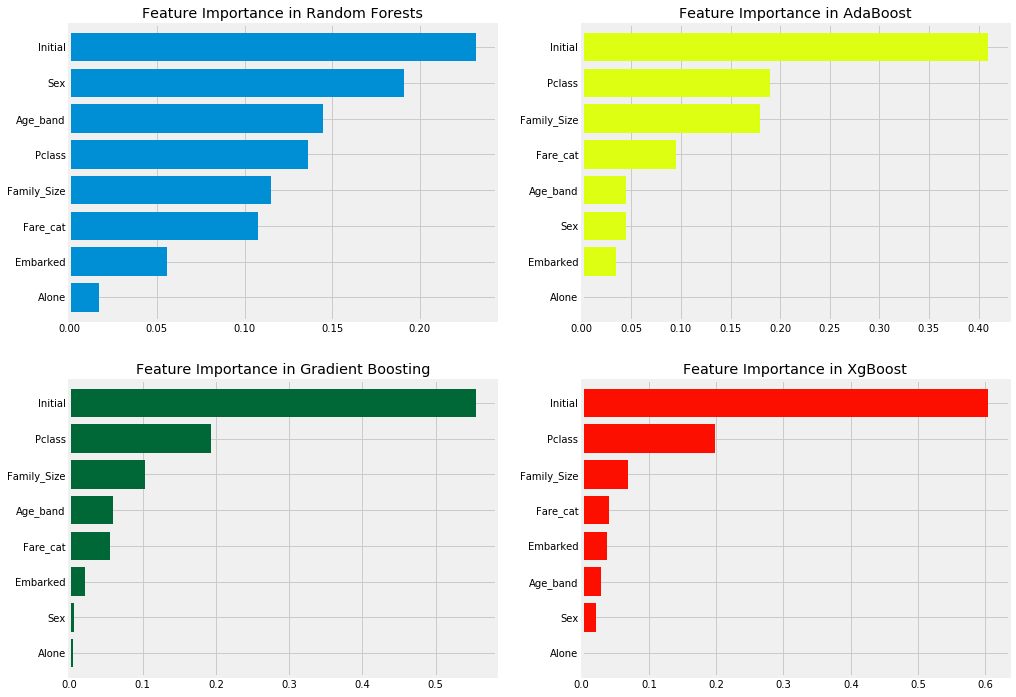

In [68]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

위 그래프를 해석해보자.

1. 일반적으로 중요한 특징으로는 Initial, Fare_cat, Pclass, Family_Size가 있다.
2. Sex 변수는 아무런 중요성을 부여하지 않는 것 같은데, 앞서 살펴본 바와 같이 Pclass+Sex가 아주 좋은 차별화 요소를 주고 있다는 사실이 충격적이다.<br>
Sex는 Random Forest에서만 중요해 보이지만,<br>
많은 분류기에서 맨 위에 있는 Initial 변수을 볼 수 있고,<br>
이미 Sex와 Initial의 긍정적인 상관관계를 보았다.
3. Pclass와 Fare_cat은 승객과 가족의 상태를 가리킨다.

이로써 타이타닉 승객 데이터를 통해 다양한 모델을 확인해보았다.